In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
EU_AIRPORT_2019_CLEANED_CODES_FILE  = "../data/cleaned/eu_cleaned_airports_2019_codes_passenger_date.csv"
EU_AIRPORT_2019_CLEANED_PASSANGER_STAT_FILE_LOC = "../data/cleaned/eu_cleaned_airports_2019_passenger_data.csv"
EU_AIRPORT_2019_COMPLETE_CLEANED_PASSANGER_STAT_FILE_LOC = "../data/cleaned/eu_cleaned_airports_2019_passenger_data_complete.csv"

# Read Data

In [3]:
df_eu_cleaned_airport_2019_passanger_stats = pd.read_csv(EU_AIRPORT_2019_CLEANED_PASSANGER_STAT_FILE_LOC, 
                                                         index_col = 0, 
                                                         header=0)
# df_eu_cleaned_airport_2019_passanger_stats.head()

In [4]:
df_eu_cleaned_airport_code_2019 = pd.read_csv(EU_AIRPORT_2019_CLEANED_CODES_FILE, 
                                 index_col = 0, 
                                 header=0)
# df_eu_cleaned_airport_code_2019.head()

# Merging Dataset 

In [5]:
df_2019_airport_passenger_stats_complete = df_eu_cleaned_airport_code_2019.join(df_eu_cleaned_airport_2019_passanger_stats, on="Name", how="inner")

In [6]:
df_2019_airport_passenger_stats_complete.drop(["Name",
                      "City",
                      "Country",
                      "Latitude",
                      "Longitude",
                      "Altitude"], inplace = True, axis =1)

In [7]:
df_2019_airport_passenger_stats_complete = df_2019_airport_passenger_stats_complete.set_index("IATA").apply(lambda x: round(x/30))

In [8]:
df_2019_airport_passenger_stats_complete

,1,2,3,4,5,6,7,8,9,10,11,12
IATA,,,,,,,,,,,,
LCG,3023.0,3013.0,3600.0,3723.0,3950.0,4156.0,4336.0,3977.0,4038.0,4138.0,3547.0,3448.0
AAL,3446.0,3466.0,4062.0,3832.0,4376.0,4484.0,4239.0,4259.0,4746.0,4568.0,3588.0,3068.0
AAR,1132.0,1208.0,1399.0,1347.0,1611.0,1615.0,1317.0,1351.0,1669.0,1615.0,1288.0,1073.0
MAD,142197.0,134757.0,158732.0,163220.0,168996.0,180491.0,191913.0,186526.0,179644.0,176769.0,153942.0,156972.0
AJA,1883.0,1706.0,2213.0,4544.0,5542.0,6911.0,7902.0,8778.0,6518.0,4272.0,2143.0,1562.0
...,...,...,...,...,...,...,...,...,...,...,...,...
VGO,2404.0,2381.0,2827.0,2933.0,2972.0,3001.0,3356.0,3191.0,3095.0,2964.0,2395.0,2257.0
VRL,9.0,8.0,12.0,24.0,23.0,27.0,16.0,0.0,0.0,0.0,0.0,0.0
VNO,11307.0,10459.0,11904.0,13938.0,16302.0,15703.0,14950.0,15655.0,15597.0,16183.0,12795.0,12092.0


# Visulize Data

<AxesSubplot:>

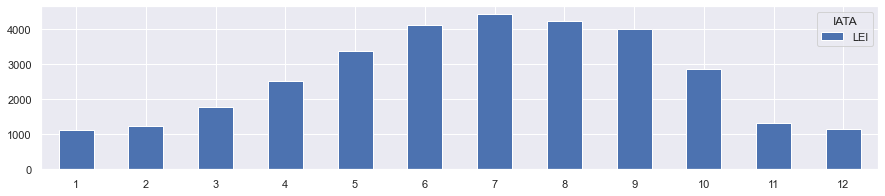

In [17]:
sns.set(rc = {'figure.figsize':(15,3)})
df_2019_airport_passenger_stats_complete.iloc[6:7].T.plot.bar(rot=0)

# Save Data

In [10]:
df_2019_airport_passenger_stats_complete.to_csv(EU_AIRPORT_2019_COMPLETE_CLEANED_PASSANGER_STAT_FILE_LOC)